The data in the dataset is of different faces. We imported the dataset and then loaded the dataset. We made a variable for the dataset called load_olivetti. The load_olivetti variable contains data, target, and DESCR.
data = has information about every pixel for every image, has 400 images
image dimensions = 64 x 64
4096 pixels per image
flatten the image
40 people were photographed 10 times each
target = number represents the person, and each person has 10 photos (so 10 of their number)
DESCR = description

In [159]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [160]:
print("hi")

hi


In [161]:
load_olivetti = fetch_olivetti_faces()

In [162]:
print(load_olivetti)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

In [163]:
first_picture = load_olivetti.data[0]

In [164]:
load_olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [165]:
load_olivetti.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [166]:
print(first_picture.shape)

(4096,)


In [167]:
data = load_olivetti.data
target = load_olivetti.target


In [168]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=.2, random_state=9)

In [169]:
for train_and_val_index, test_index in sss.split(data, target): 
    data_train_and_val= data[train_and_val_index]
    data_test = data[test_index]
    target_train_and_val = target[train_and_val_index]
    target_test = target[test_index]
    

for train_index, val_index in sss.split(data_train_and_val, target_train_and_val): 
    data_train= data[train_index]
    data_val = data[val_index]
    target_train = target[train_index]
    target_val = target[val_index]
    
print(data_train)


[[0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]
 [0.20661157 0.2768595  0.3553719  ... 0.30991736 0.37190083 0.38429752]
 [0.6570248  0.677686   0.6983471  ... 0.11570248 0.11570248 0.10330579]
 ...
 [0.7107438  0.74793386 0.76859504 ... 0.39256197 0.47933885 0.7107438 ]
 [0.47933885 0.5495868  0.6280992  ... 0.2231405  0.21900827 0.22727273]
 [0.41735536 0.47107437 0.59504133 ... 0.14876033 0.15289256 0.20661157]]


In [170]:
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(256, 4096)
(64, 4096)
(80, 4096)


In [171]:
print(data_train[0])


[0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]


In [172]:
from sklearn.cluster import KMeans
k = 120
kmeans = KMeans(n_clusters=k)
target_pred = kmeans.fit_predict(data_train)

In [173]:
print(target_pred)



[ 28  74  19  25  46  29   7  23   8  28  52  25  64  59  45  70  17 108
  60  62  66  28 118  97  76  31  26  22  49  90  66  34  87  89  31 114
  19  80  44 111  51 104  33  23  27  41  40  67  98  24   4  72  41 101
  79 113  59 103  39  16  42   7  70   4  71  43 109  50  50  14  68  29
  53  91 119   1  39  70  64  54   0   2 105  17   7  15 117  47  93   0
  52  69  61  54 116  55  94  55   1  22  49  92  90  67  38  68  62  48
  16  75  27  16  52  12  11  14  32   9  67  47   0  24  87  90  31  37
  53  56  15  71  27  80  50  67  72 118  72   4  97   3   9  37  67  35
   5   9  60  64  73  42 111  53 106   0  38  36  18  33  73 107  35  44
  67  95  47  16   7  95  65  57  12  29  17  21  20   5  51  84  43  69
  22  57  26  54  86  81 118  20  58  21   3  13  78  47  59 100  96  50
  74   1  75 116 104  12  17 106   4  36 116  29  56 106  85  93  60  43
  83  65  27  89   1  18  70 116 109  74  55  63  41  57  10  30  10  28
  90  77   2 112  99 115  31  82  23  88 102  62   

In [174]:

print(len(target_pred))

256


In [175]:
#printing one picture
first_picture_train = data_train[0]

In [176]:
# reshape array

first_picture_train_reshaped = first_picture_train.reshape(64, 64)
print(first_picture_train_reshaped)


[[0.5206612  0.5206612  0.53305787 ... 0.60330576 0.59090906 0.5371901 ]
 [0.5082645  0.5123967  0.5165289  ... 0.59090906 0.5661157  0.5371901 ]
 [0.48347107 0.5123967  0.5041322  ... 0.57438016 0.55785125 0.53305787]
 ...
 [0.3966942  0.38016528 0.37603307 ... 0.46694216 0.4338843  0.4338843 ]
 [0.36363637 0.39256197 0.35950413 ... 0.46694216 0.4338843  0.4338843 ]
 [0.33471075 0.3966942  0.3677686  ... 0.46694216 0.43801653 0.43801653]]


In [177]:
print(first_picture_train_reshaped.shape)

(64, 64)


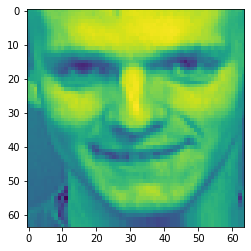

In [178]:
plt.imshow(first_picture_train_reshaped)

In [179]:
second_picture_train = data_train[1]
#get all indexes of all images of person 8
print(target_pred)


[ 28  74  19  25  46  29   7  23   8  28  52  25  64  59  45  70  17 108
  60  62  66  28 118  97  76  31  26  22  49  90  66  34  87  89  31 114
  19  80  44 111  51 104  33  23  27  41  40  67  98  24   4  72  41 101
  79 113  59 103  39  16  42   7  70   4  71  43 109  50  50  14  68  29
  53  91 119   1  39  70  64  54   0   2 105  17   7  15 117  47  93   0
  52  69  61  54 116  55  94  55   1  22  49  92  90  67  38  68  62  48
  16  75  27  16  52  12  11  14  32   9  67  47   0  24  87  90  31  37
  53  56  15  71  27  80  50  67  72 118  72   4  97   3   9  37  67  35
   5   9  60  64  73  42 111  53 106   0  38  36  18  33  73 107  35  44
  67  95  47  16   7  95  65  57  12  29  17  21  20   5  51  84  43  69
  22  57  26  54  86  81 118  20  58  21   3  13  78  47  59 100  96  50
  74   1  75 116 104  12  17 106   4  36 116  29  56 106  85  93  60  43
  83  65  27  89   1  18  70 116 109  74  55  63  41  57  10  30  10  28
  90  77   2 112  99 115  31  82  23  88 102  62   

In [180]:
empty_array = []
array_length = len(target_pred)
for i in range(0,array_length):
    if target_pred[i] == 8:
        empty_array.append(i)
        
print(empty_array)


[8]


In [181]:
picturesofperson8 = data_train[empty_array]

In [182]:
print(target_pred.shape)

(256,)


In [183]:
print(picturesofperson8)

[[0.2603306  0.19421488 0.1446281  ... 0.6983471  0.70247936 0.6983471 ]]


In [184]:
print(picturesofperson8.shape)

(1, 4096)


[0.2603306  0.19421488 0.1446281  ... 0.6983471  0.70247936 0.6983471 ]
1


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

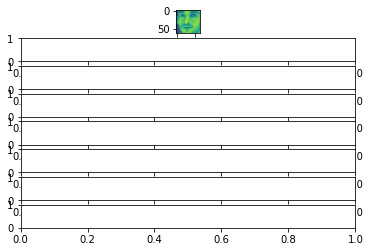

In [185]:
from matplotlib.image import imread
import matplotlib.pyplot as plt


picturesofperson8_reshaped = []
for i in range(0,len(picturesofperson8)):
    print(picturesofperson8[i])
    x = picturesofperson8[i].reshape(64, 64)
    picturesofperson8_reshaped.append(x)
print(len(picturesofperson8_reshaped))

#Aadhar Bhatt's answer
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(8,1) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(picturesofperson8_reshaped[0])
axarr[1].imshow(picturesofperson8_reshaped[1])
axarr[2].imshow(picturesofperson8_reshaped[2])


In [ ]:

picturesofperson8_reshaped = []
for i in range(0,len(picturesofperson8)):
    print(picturesofperson8[i])
    x = picturesofperson8[i].reshape(64, 64)
    picturesofperson8_reshaped.append(x)
print(len(picturesofperson8_reshaped))

In [ ]:
empty_array = []
array_length = len(target_pred)
for i in range(0,array_length):
    if target_pred[i] == 5:
        empty_array.append(i)
        
print(empty_array)

picturesofperson5 = data_train[empty_array]

from matplotlib.image import imread
import matplotlib.pyplot as plt


picturesofperson5_reshaped = []
for i in range(0,len(picturesofperson5)):
    print(picturesofperson5[i])
    x = picturesofperson5[i].reshape(64, 64)
    picturesofperson5_reshaped.append(x)
print(len(picturesofperson5_reshaped))

#Aadhar Bhatt's answer
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(6,1) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(picturesofperson5_reshaped[0])
axarr[1].imshow(picturesofperson5_reshaped[1])
axarr[2].imshow(picturesofperson5_reshaped[2])
axarr[3].imshow(picturesofperson5_reshaped[3])
axarr[4].imshow(picturesofperson5_reshaped[4])
axarr[5].imshow(picturesofperson5_reshaped[5])

In [ ]:
def my_function():
  print("Hello from a function")

my_function()

In [ ]:
def my_function(fname):
  print(fname + " Refsnes")

my_function("Emil")
my_function("Tobias")
my_function("Linus")

In [ ]:
def number_function(number):
    number = number + 1
    print(number)

In [ ]:
number_function(10)

[0.5165289  0.5123967  0.5082645  ... 0.56198347 0.55785125 0.5661157 ]
[0.32231405 0.4090909  0.45454547 ... 0.07438017 0.2768595  0.45454547]
2


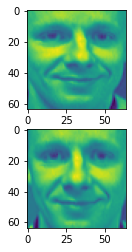

In [186]:
def olivetti_faces(personnumber):
    empty_array = []
    array_length = len(target_pred)
    for i in range(0,array_length):
        if target_pred[i] == personnumber:
            empty_array.append(i)
    picturesofpersonx = data_train[empty_array]
    picturesofpersonx_reshaped = []
    for i in range(0,len(picturesofpersonx)):
        print(picturesofpersonx[i])
        x = picturesofpersonx[i].reshape(64, 64)
        picturesofpersonx_reshaped.append(x)
    print(len(picturesofpersonx_reshaped))
    f, axarr = plt.subplots(len(picturesofpersonx),1) 
    for i in range(0, len(picturesofpersonx)):
        axarr[i].imshow(picturesofpersonx_reshaped[i])
        
olivetti_faces(2)

In [187]:
from sklearn.metrics import silhouette_score
silhouette_score(data_train, kmeans.labels_)

0.20053938

In [188]:
numberofclusters = []
silhouettescore = []

In [189]:
for i in range (5, 100, 5):
    k = i
    numberofclusters.append(k)
    kmeans = KMeans(n_clusters=k)
    target_pred = kmeans.fit_predict(data_train)
    SS = silhouette_score(data_train, kmeans.labels_)
    silhouettescore.append(SS)
    
    

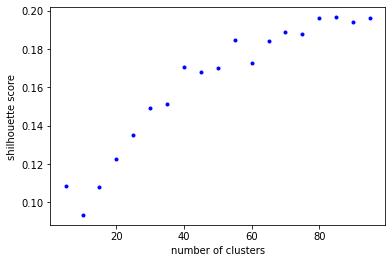

In [190]:
#create and plot the quadratic data
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.xlabel("number of clusters") 
plt.ylabel("shilhouette score") 


plt.plot(numberofclusters,silhouettescore,"b.")
plt.show()

In [191]:

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(data_train, target_pred)

DecisionTreeClassifier(max_depth=2)

In [200]:
first = data_train[90]
print(first)
prediction = tree_clf.predict_proba([first])
print(prediction)

[0.21900827 0.17768595 0.18181819 ... 0.20661157 0.21900827 0.2231405 ]
[[0.00826446 0.02892562 0.01652893 0.01652893 0.00826446 0.00826446
  0.01652893 0.01239669 0.02066116 0.01652893 0.00413223 0.02479339
  0.02066116 0.01239669 0.02066116 0.01239669 0.01652893 0.01239669
  0.00826446 0.02066116 0.01652893 0.01652893 0.01239669 0.02066116
  0.00826446 0.         0.00413223 0.01652893 0.01239669 0.01239669
  0.01239669 0.00826446 0.01652893 0.01239669 0.00826446 0.00826446
  0.01239669 0.02066116 0.00413223 0.01239669 0.00413223 0.01239669
  0.00413223 0.00413223 0.         0.01652893 0.00826446 0.02066116
  0.01652893 0.00826446 0.01239669 0.00826446 0.00826446 0.01652893
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.01239669
  0.01652893 0.00413223 0.01239669 0.00413223 0.00826446 0.00413223
  0.00826446 0.00826446 0.00826446 0.00826446 0.00413223 0.00413223
  0.01239669 0.00826446 0.00413223 0.00413223 0.00826446 0.01239669
  0.00826446 0.00826446 0.01239669 0.0041322

In [201]:
first = data_train[7]
print(first)
prediction = tree_clf.predict_proba([first])
print(prediction)

[0.55785125 0.6280992  0.677686   ... 0.446281   0.27272728 0.39256197]
[[0.00826446 0.02892562 0.01652893 0.01652893 0.00826446 0.00826446
  0.01652893 0.01239669 0.02066116 0.01652893 0.00413223 0.02479339
  0.02066116 0.01239669 0.02066116 0.01239669 0.01652893 0.01239669
  0.00826446 0.02066116 0.01652893 0.01652893 0.01239669 0.02066116
  0.00826446 0.         0.00413223 0.01652893 0.01239669 0.01239669
  0.01239669 0.00826446 0.01652893 0.01239669 0.00826446 0.00826446
  0.01239669 0.02066116 0.00413223 0.01239669 0.00413223 0.01239669
  0.00413223 0.00413223 0.         0.01652893 0.00826446 0.02066116
  0.01652893 0.00826446 0.01239669 0.00826446 0.00826446 0.01652893
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.01239669
  0.01652893 0.00413223 0.01239669 0.00413223 0.00826446 0.00413223
  0.00826446 0.00826446 0.00826446 0.00826446 0.00413223 0.00413223
  0.01239669 0.00826446 0.00413223 0.00413223 0.00826446 0.01239669
  0.00826446 0.00826446 0.01239669 0.0041322

In [203]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, data_train, target_pred, cv = 3, scoring="accuracy")

/Users/mayatang/opt/anaconda3/envs/scikitlearn_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


array([0.04651163, 0.03529412, 0.07058824])

In [204]:
print(target_pred)

[62  8 86 12 34 44 20  2 21 36 23 42 19 66 53  8 32 91 41 72 68 36 44 77
 38 48 64 21 55 18 68 30 53 78 48 82 17 17 52 65 35 23 47  2 33 80 60 14
 81 28 27 29 80  4 25 87 66  6 59 13  6 20 89 27  3 47 45 37 37  5  1 44
  7 94 46 16 59  8 19 50  9  3 62 32 20 76 25 12 60  9 23  0 75 50 11 10
 77 88 16 21 86 84 83 14  1  1 72 61 73 57 33 13 23 22 89  5 25 15 14 12
  9 28 53 18 48 31  7 69 76  3 33 17 37  2 29 44 29 27 77 56 15 31 14 51
 88 15 41 19 67  6 73  7 93  9  1 49 24 47 67 11 51 52 14 25 12 13 20 25
 79 39 22 44 32 92 45 19 35 71 47  0 21 39 64 50 37 43 44 45 25 92 56  6
 86 12 40 53 26 37  8 16 57 11 23 22 32  1 27 49 11 44 69  1 90 60 41 47
 70 79 58 78 16 24 89 11 45  8 88 74 80 39 11 46 19 36 83 63  3 42 30 54
 48 85  2  1 58 72 54 30 55  4 62 59 34 28 60 92]
